In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.integrate import solve_ivp
from scipy.integrate import ode 
from numpy import log10 as lg
from numpy import pi as pi
from numpy import sin as sin
from numpy import cos as cos
from numpy import tan as tan
from scipy.interpolate import interp1d as sp_interp1d
from astropy import constants as const
from astropy import units as u
import math
from math import radians as radian
from numpy import linalg as LA
from scipy.special import ellipj
from numpy import e as e
from numpy import tan as tan


G=const.G.cgs.value
c=const.c.cgs.value
Ms=const.M_sun.cgs.value
hbar=const.hbar.cgs.value
m_n=const.m_n.cgs.value
km=10**5
yr=(1.0*u.yr).cgs.value

# customize the plot 
plt.rcParams['xtick.labelsize'] = 25
plt.rcParams['ytick.labelsize'] = 25
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.major.size'] = 8
plt.rcParams['ytick.major.size'] = 8
plt.rcParams['xtick.minor.size'] = 4
plt.rcParams['ytick.minor.size'] = 4
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.right'] = True
plt.rcParams['axes.labelpad'] = 8.0
plt.rcParams['figure.constrained_layout.h_pad'] = 0
plt.rcParams['text.usetex'] = True
plt.rc('text', usetex=True)
plt.rcParams['font.sans-serif'] = ['Times New Roman']
plt.tick_params(axis='both', which='minor', labelsize=18)


plt.rcParams['xtick.major.width'] = 2

plt.rcParams['xtick.minor.width'] = 1

plt.rcParams['ytick.major.width'] = 2

plt.rcParams['ytick.minor.width'] = 1
plt.close()

In [2]:
def tau(P,eps,Bp,k):
    omega0=2*pi/P
    M=1.4*Ms
    R=10*km
    I0=0.4 * M * R**2
    m=1/2 * Bp * R**3
    taup=1/eps/omega0
    tauc=3*c**3*I0 / 2 / omega0**2 / m**2
    taua=2*R*omega0*tauc / 3 / k /c
    return taup, taua, tauc

23094010.767585028
28284271.2474619


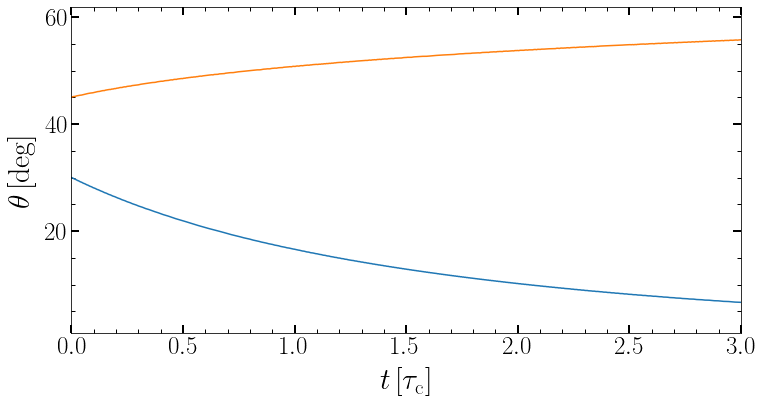

In [27]:
def Euler(t,y,epsilon,delta,P,Bp,k,chi,eta):
    
#     taup,taua,tauc=tau(P,epsilon,Bp,k)
    
    u1=y[0]; u2=y[1]; u3=y[2]
    
    du1=-1/(1+delta)/taup * u2*u3 + ((u3*cos(chi) + \
        u1*cos(eta)*sin(chi) + u2*sin(chi)*sin(eta))*(u2*cos(chi)\
        - u3*sin(chi)*sin(eta)))/taua + ((u1**2 + u2**2 + u3**2)*\
        (-u1 + cos(eta)*sin(chi)*(u3*cos(chi) \
        + u1*cos(eta)*sin(chi) + u2*sin(chi)*sin(eta))))/tauc
    
    du2=(1/taup * u1*u3 + ((-(u1*cos(chi)) + \
        u3*cos(eta)*sin(chi))*(u3*cos(chi) + u1*cos(eta)*sin(chi) \
        + u2*sin(chi)*sin(eta)))/taua + ((u1**2 + u2**2 + u3**2)*(-u2 \
        + sin(chi)*sin(eta)*(u3*cos(chi) + u1*cos(eta)*sin(chi) + \
        u2*sin(chi)*sin(eta))))/tauc)/(1+epsilon*delta/(1+delta))
    
    du3=(-u1*u2*delta/(1+delta)/taup+ sin(chi)*(((u1**2 + u2**2 + u3**2)*\
        (u1*cos(chi)*cos(eta) - u3*sin(chi) + \
        u2*cos(chi)*sin(eta)))/tauc + \
        ((-(u2*cos(eta)) + u1*sin(eta))*\
        (u3*cos(chi) + u1*cos(eta)*sin(chi) + \
        u2*sin(chi)*sin(eta)))/taua))/(1+epsilon)
    
    return [du1,du2,du3]


theta=radian(30)
epsilon=1e-7
delta=0
P=2
Bp=1e14
k=0.6
chi=radian(20)
eta=radian(0)
period=np.abs(P/epsilon/cos(theta))
print(period)
taup=P/epsilon; taua=1000*taup;tauc=10000*taup
# taup, taua, tauc=tau(P,epsilon,Bp,k)

x=np.linspace(0,40000*period,1000)
xspan=[x[0],x[-1]]
y0=[sin(theta),0,cos(theta)]
sol1=solve_ivp(Euler,xspan,y0,t_eval=x,args=(epsilon,delta,P,Bp,k,chi,eta),method='DOP853',rtol=1e-8)
# fig, (ax1, ax2) = plt.subplots(2,sharex=True,figsize=(8,6))
# ax1.plot(sol.t,sol.y[0,:])
# ax1.plot(sol.t,sol.y[1,:])
# ax2.plot(sol.t,sol.y[2,:])
# ax2.minorticks_on()
# ax1.minorticks_on()

u1=sol1.y[0,:]
u2=sol1.y[1,:]
u3=sol1.y[2,:]
L=(u1**2 + u2**2 + (1+epsilon)**2 * u3**2)**(0.5)
L3=(1+epsilon)*u3
Theta=np.arccos(L3/L)/pi*180

plt.figure(figsize=(12,6))
plt.plot(x/tauc,Theta)

theta=radian(45)
epsilon=1e-7
delta=0
P=2
Bp=1e14
k=0.6
chi=radian(70)
eta=radian(0)
period=np.abs(P/epsilon/cos(theta))
print(period)
taup=P/epsilon; taua=1000*taup;tauc=10000*taup
# taup, taua, tauc=tau(P,epsilon,Bp,k)

x=np.linspace(0,40000*period,1000)
xspan=[x[0],x[-1]]
y0=[sin(theta),0,cos(theta)]
sol1=solve_ivp(Euler,xspan,y0,t_eval=x,args=(epsilon,delta,P,Bp,k,chi,eta),method='DOP853',rtol=1e-8)
# fig, (ax1, ax2) = plt.subplots(2,sharex=True,figsize=(8,6))
# ax1.plot(sol.t,sol.y[0,:])
# ax1.plot(sol.t,sol.y[1,:])
# ax2.plot(sol.t,sol.y[2,:])
# ax2.minorticks_on()
# ax1.minorticks_on()

u1=sol1.y[0,:]
u2=sol1.y[1,:]
u3=sol1.y[2,:]
L=(u1**2 + u2**2 + (1+epsilon)**2 * u3**2)**(0.5)
L3=(1+epsilon)*u3
Theta=np.arccos(L3/L)/pi*180


plt.plot(x/tauc,Theta)
plt.xlim(0,3)

plt.xlabel(r'$t\, [\tau_{\rm c}]$',fontsize=30)
plt.ylabel(r'$\theta\, [\rm deg]$',fontsize=30)
plt.minorticks_on()

40000000.000000015


(0.0, 6.0)

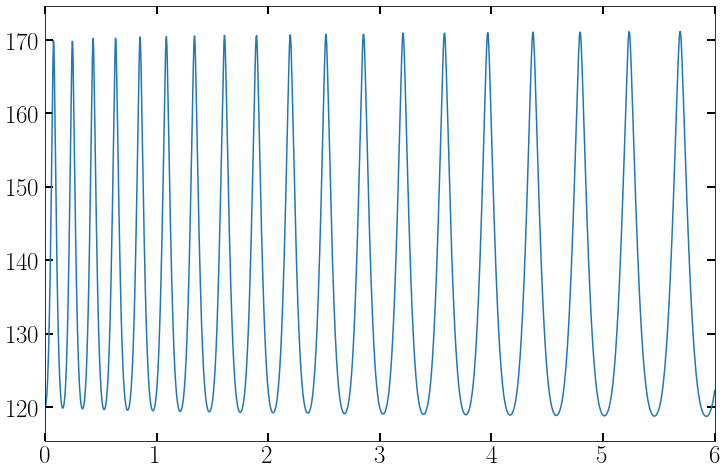

In [39]:
def Euler(t,y,epsilon,delta,P,Bp,k,chi,eta):
    
#     taup,taua,tauc=tau(P,epsilon,Bp,k)
    
    u1=y[0]; u2=y[1]; u3=y[2]
    
    du1=-1/(1+delta)/taup * u2*u3 + ((u3*cos(chi) + \
        u1*cos(eta)*sin(chi) + u2*sin(chi)*sin(eta))*(u2*cos(chi)\
        - u3*sin(chi)*sin(eta)))/taua + ((u1**2 + u2**2 + u3**2)*\
        (-u1 + cos(eta)*sin(chi)*(u3*cos(chi) \
        + u1*cos(eta)*sin(chi) + u2*sin(chi)*sin(eta))))/tauc
    
    du2=(1/taup * u1*u3 + ((-(u1*cos(chi)) + \
        u3*cos(eta)*sin(chi))*(u3*cos(chi) + u1*cos(eta)*sin(chi) \
        + u2*sin(chi)*sin(eta)))/taua + ((u1**2 + u2**2 + u3**2)*(-u2 \
        + sin(chi)*sin(eta)*(u3*cos(chi) + u1*cos(eta)*sin(chi) + \
        u2*sin(chi)*sin(eta))))/tauc)/(1+epsilon*delta/(1+delta))
    
    du3=(-u1*u2*delta/(1+delta)/taup+ sin(chi)*(((u1**2 + u2**2 + u3**2)*\
        (u1*cos(chi)*cos(eta) - u3*sin(chi) + \
        u2*cos(chi)*sin(eta)))/tauc + \
        ((-(u2*cos(eta)) + u1*sin(eta))*\
        (u3*cos(chi) + u1*cos(eta)*sin(chi) + \
        u2*sin(chi)*sin(eta)))/taua))/(1+epsilon)
    
    return [du1,du2,du3]


theta=radian(120)
epsilon=1e-7
delta=0
P=2
Bp=1e15
k=0.6
chi=radian(20)
eta=radian(0)
period=np.abs(P/epsilon/cos(theta))
print(period)
taup=P/epsilon; taua=1*taup;tauc=100*taup

x=np.linspace(0,1000*period,5000)
xspan=[x[0],x[-1]]
y0=[sin(theta),0,cos(theta)]
sol2=solve_ivp(Euler,xspan,y0,t_eval=x,args=(epsilon,delta,P,Bp,k,chi,eta),method='DOP853',rtol=1e-8)
# fig, (ax1, ax2) = plt.subplots(2,sharex=True,figsize=(8,6))
# ax1.plot(sol.t,sol.y[0,:])
# ax1.plot(sol.t,sol.y[1,:])
# ax2.plot(sol.t,sol.y[2,:])
# ax2.minorticks_on()
# ax1.minorticks_on()

u1=sol2.y[0,:]
u2=sol2.y[1,:]
u3=sol2.y[2,:]
L=(u1**2 + u2**2 + (1+epsilon)**2 * u3**2)**(0.5)
L3=(1+epsilon)*u3
Theta=np.arccos(L3/L)/pi*180

plt.figure(figsize=(12,8))
plt.plot(x/tauc,Theta)
plt.xlim(0,6)

28284271.2474619


(0.0, 6.0)

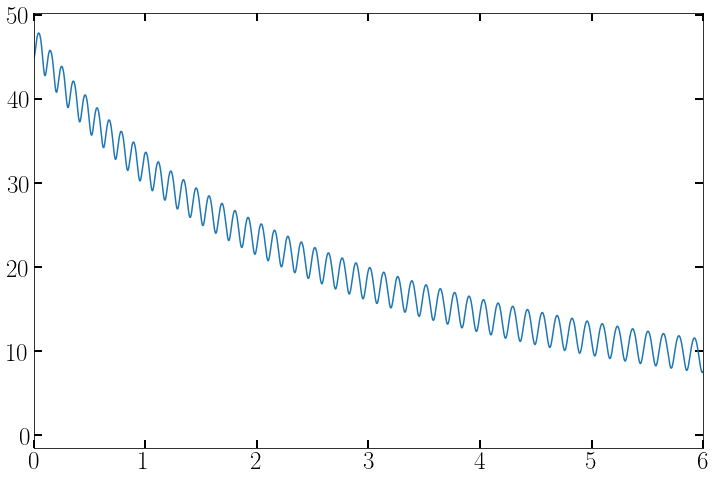

In [76]:
def Euler(t,y,epsilon,delta,P,Bp,k,chi,eta):
    
#     taup,taua,tauc=tau(P,epsilon,Bp,k)
    
    u1=y[0]; u2=y[1]; u3=y[2]
    
    du1=-1/(1+delta)/taup * u2*u3 + ((u3*cos(chi) + \
        u1*cos(eta)*sin(chi) + u2*sin(chi)*sin(eta))*(u2*cos(chi)\
        - u3*sin(chi)*sin(eta)))/taua + ((u1**2 + u2**2 + u3**2)*\
        (-u1 + cos(eta)*sin(chi)*(u3*cos(chi) \
        + u1*cos(eta)*sin(chi) + u2*sin(chi)*sin(eta))))/tauc
    
    du2=(1/taup * u1*u3 + ((-(u1*cos(chi)) + \
        u3*cos(eta)*sin(chi))*(u3*cos(chi) + u1*cos(eta)*sin(chi) \
        + u2*sin(chi)*sin(eta)))/taua + ((u1**2 + u2**2 + u3**2)*(-u2 \
        + sin(chi)*sin(eta)*(u3*cos(chi) + u1*cos(eta)*sin(chi) + \
        u2*sin(chi)*sin(eta))))/tauc)/(1+epsilon*delta/(1+delta))
    
    du3=(-u1*u2*delta/(1+delta)/taup+ sin(chi)*(((u1**2 + u2**2 + u3**2)*\
        (u1*cos(chi)*cos(eta) - u3*sin(chi) + \
        u2*cos(chi)*sin(eta)))/tauc + \
        ((-(u2*cos(eta)) + u1*sin(eta))*\
        (u3*cos(chi) + u1*cos(eta)*sin(chi) + \
        u2*sin(chi)*sin(eta)))/taua))/(1+epsilon)
    
    return [du1,du2,du3]


theta=radian(45)
epsilon=1e-7
delta=0
P=2
Bp=1e15
k=0.6
chi=radian(20)
eta=radian(0)
period=np.abs(P/epsilon/cos(theta))
print(period)
taup=P/epsilon; taua=10*taup;tauc=100*taup

x=np.linspace(0,1000*period,5000)
xspan=[x[0],x[-1]]
y0=[sin(theta),0,cos(theta)]
sol3=solve_ivp(Euler,xspan,y0,t_eval=x,args=(epsilon,delta,P,Bp,k,chi,eta),method='DOP853',rtol=1e-8)
# fig, (ax1, ax2) = plt.subplots(2,sharex=True,figsize=(8,6))
# ax1.plot(sol.t,sol.y[0,:])
# ax1.plot(sol.t,sol.y[1,:])
# ax2.plot(sol.t,sol.y[2,:])
# ax2.minorticks_on()
# ax1.minorticks_on()

u1=sol3.y[0,:]
u2=sol3.y[1,:]
u3=sol3.y[2,:]
L=(u1**2 + u2**2 + (1+epsilon)**2 * u3**2)**(0.5)
L3=(1+epsilon)*u3
Theta=np.arccos(L3/L)/pi*180
alpha=np.arccos((u1*sin(chi)+u3*cos(chi))/(u1**2 + u2**2 + u3**2)**(0.5))

plt.figure(figsize=(12,8))
plt.plot(x/tauc,Theta)
plt.xlim(0,6)

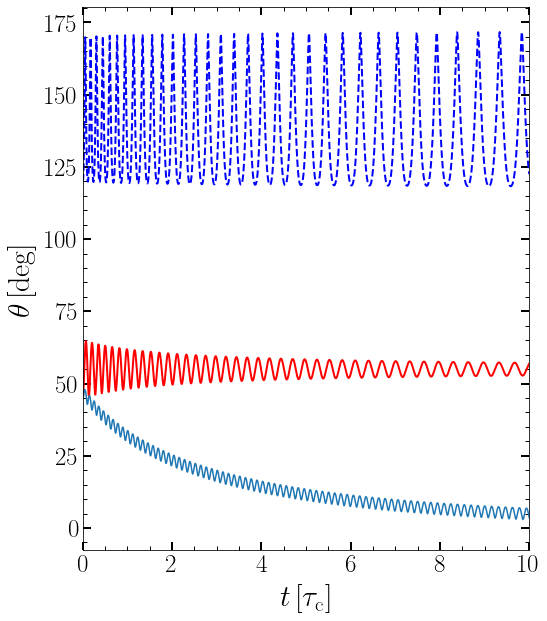

In [77]:
plt.figure(figsize=(8,10))
u1=sol1.y[0,:]
u2=sol1.y[1,:]
u3=sol1.y[2,:]
L=(u1**2 + u2**2 + (1+epsilon)**2 * u3**2)**(0.5)
L3=(1+epsilon)*u3
Theta=np.arccos(L3/L)/pi*180
plt.plot(x/tauc,Theta,color='r',linewidth=2)


u1=sol2.y[0,:]
u2=sol2.y[1,:]
u3=sol2.y[2,:]
L=(u1**2 + u2**2 + (1+epsilon)**2 * u3**2)**(0.5)
L3=(1+epsilon)*u3
Theta=np.arccos(L3/L)/pi*180
plt.plot(x/tauc,Theta,color='b',linewidth=2,linestyle='dashed')


u1=sol3.y[0,:]
u2=sol3.y[1,:]
u3=sol3.y[2,:]
L=(u1**2 + u2**2 + (1+epsilon)**2 * u3**2)**(0.5)
L3=(1+epsilon)*u3
Theta=np.arccos(L3/L)/pi*180
plt.plot(x/tauc,Theta)

plt.xlim(0,10)
plt.minorticks_on()
plt.xlabel(r'$t\, [\tau_{\rm c}]$',fontsize=30)
plt.ylabel(r'$\theta\, [\rm deg]$',fontsize=30)
plt.savefig("/Users/yonggao/desktop/theta.pdf", format='pdf', bbox_inches="tight")

28284271.2474619


(0.0, 6.0)

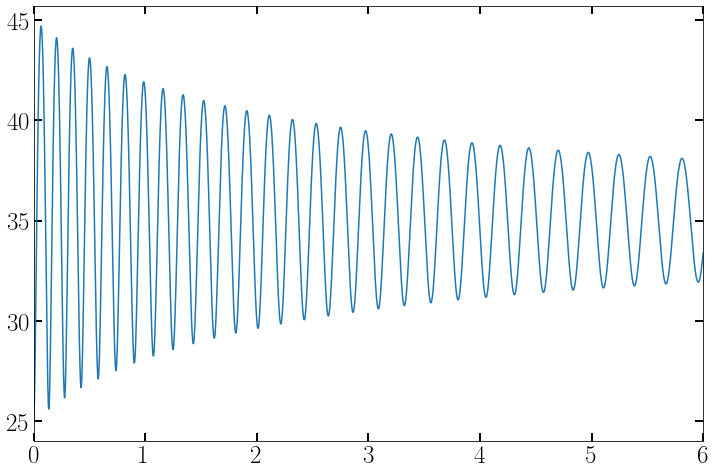

In [114]:
def Euler(t,y,epsilon,delta,P,Bp,k,chi,eta):
    
#     taup,taua,tauc=tau(P,epsilon,Bp,k)
    
    u1=y[0]; u2=y[1]; u3=y[2]
    
    du1=-1/(1+delta)/taup * u2*u3 + ((u3*cos(chi) + \
        u1*cos(eta)*sin(chi) + u2*sin(chi)*sin(eta))*(u2*cos(chi)\
        - u3*sin(chi)*sin(eta)))/taua + ((u1**2 + u2**2 + u3**2)*\
        (-u1 + cos(eta)*sin(chi)*(u3*cos(chi) \
        + u1*cos(eta)*sin(chi) + u2*sin(chi)*sin(eta))))/tauc
    
    du2=(1/taup * u1*u3 + ((-(u1*cos(chi)) + \
        u3*cos(eta)*sin(chi))*(u3*cos(chi) + u1*cos(eta)*sin(chi) \
        + u2*sin(chi)*sin(eta)))/taua + ((u1**2 + u2**2 + u3**2)*(-u2 \
        + sin(chi)*sin(eta)*(u3*cos(chi) + u1*cos(eta)*sin(chi) + \
        u2*sin(chi)*sin(eta))))/tauc)/(1+epsilon*delta/(1+delta))
    
    du3=(-u1*u2*delta/(1+delta)/taup+ sin(chi)*(((u1**2 + u2**2 + u3**2)*\
        (u1*cos(chi)*cos(eta) - u3*sin(chi) + \
        u2*cos(chi)*sin(eta)))/tauc + \
        ((-(u2*cos(eta)) + u1*sin(eta))*\
        (u3*cos(chi) + u1*cos(eta)*sin(chi) + \
        u2*sin(chi)*sin(eta)))/taua))/(1+epsilon)
    
    return [du1,du2,du3]


theta=radian(45)
epsilon=1e-7
delta=0
P=2
Bp=1e15
k=0.6
chi=radian(20)
eta=radian(0)
period=np.abs(P/epsilon/cos(theta))
print(period)
taup=P/epsilon; taua=1*taup;tauc=100*taup

x=np.linspace(0,1000*period,5000)
xspan=[x[0],x[-1]]
y0=[sin(theta),0,cos(theta)]
sol1=solve_ivp(Euler,xspan,y0,t_eval=x,args=(epsilon,delta,P,Bp,k,chi,eta),method='DOP853',rtol=1e-8)
# fig, (ax1, ax2) = plt.subplots(2,sharex=True,figsize=(8,6))
# ax1.plot(sol.t,sol.y[0,:])
# ax1.plot(sol.t,sol.y[1,:])
# ax2.plot(sol.t,sol.y[2,:])
# ax2.minorticks_on()
# ax1.minorticks_on()

u1=sol1.y[0,:]
u2=sol1.y[1,:]
u3=sol1.y[2,:]
L=(u1**2 + u2**2 + (1+epsilon)**2 * u3**2)**(0.5)
L3=(1+epsilon)*u3
Theta=np.arccos(L3/L)/pi*180
alpha=np.arccos((u1*sin(chi)+u3*cos(chi))/(u1**2 + u2**2 + u3**2)**(0.5))/pi*180

plt.figure(figsize=(12,8))
plt.plot(x/tauc,alpha)
plt.xlim(0,6)

40000000.000000015


(0.0, 3.0)

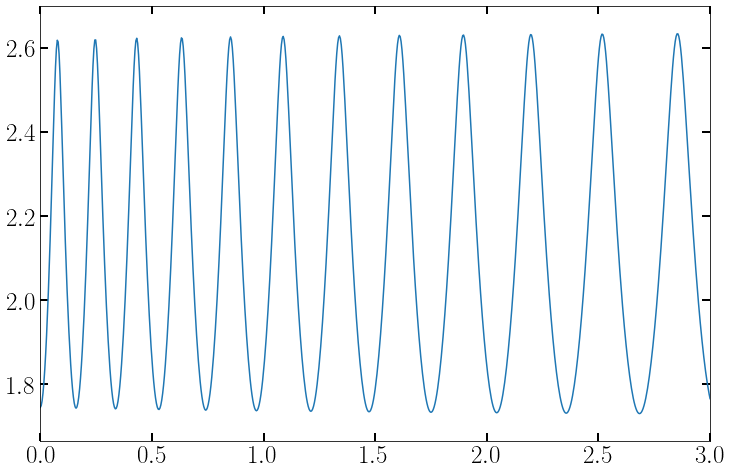

In [111]:
def Euler(t,y,epsilon,delta,P,Bp,k,chi,eta):
    
#     taup,taua,tauc=tau(P,epsilon,Bp,k)
    
    u1=y[0]; u2=y[1]; u3=y[2]
    
    du1=-1/(1+delta)/taup * u2*u3 + ((u3*cos(chi) + \
        u1*cos(eta)*sin(chi) + u2*sin(chi)*sin(eta))*(u2*cos(chi)\
        - u3*sin(chi)*sin(eta)))/taua + ((u1**2 + u2**2 + u3**2)*\
        (-u1 + cos(eta)*sin(chi)*(u3*cos(chi) \
        + u1*cos(eta)*sin(chi) + u2*sin(chi)*sin(eta))))/tauc
    
    du2=(1/taup * u1*u3 + ((-(u1*cos(chi)) + \
        u3*cos(eta)*sin(chi))*(u3*cos(chi) + u1*cos(eta)*sin(chi) \
        + u2*sin(chi)*sin(eta)))/taua + ((u1**2 + u2**2 + u3**2)*(-u2 \
        + sin(chi)*sin(eta)*(u3*cos(chi) + u1*cos(eta)*sin(chi) + \
        u2*sin(chi)*sin(eta))))/tauc)/(1+epsilon*delta/(1+delta))
    
    du3=(-u1*u2*delta/(1+delta)/taup+ sin(chi)*(((u1**2 + u2**2 + u3**2)*\
        (u1*cos(chi)*cos(eta) - u3*sin(chi) + \
        u2*cos(chi)*sin(eta)))/tauc + \
        ((-(u2*cos(eta)) + u1*sin(eta))*\
        (u3*cos(chi) + u1*cos(eta)*sin(chi) + \
        u2*sin(chi)*sin(eta)))/taua))/(1+epsilon)
    
    return [du1,du2,du3]


theta=radian(120)
epsilon=1e-7
delta=0
P=2
Bp=1e15
k=0.6
chi=radian(20)
eta=radian(0)
period=np.abs(P/epsilon/cos(theta))
print(period)
taup=P/epsilon; taua=1*taup;tauc=100*taup

x=np.linspace(0,1000*period,5000)
xspan=[x[0],x[-1]]
y0=[sin(theta),0,cos(theta)]
sol2=solve_ivp(Euler,xspan,y0,t_eval=x,args=(epsilon,delta,P,Bp,k,chi,eta),method='DOP853',rtol=1e-8)
# fig, (ax1, ax2) = plt.subplots(2,sharex=True,figsize=(8,6))
# ax1.plot(sol.t,sol.y[0,:])
# ax1.plot(sol.t,sol.y[1,:])
# ax2.plot(sol.t,sol.y[2,:])
# ax2.minorticks_on()
# ax1.minorticks_on()

u1=sol2.y[0,:]
u2=sol2.y[1,:]
u3=sol2.y[2,:]
L=(u1**2 + u2**2 + (1+epsilon)**2 * u3**2)**(0.5)
L3=(1+epsilon)*u3
Theta=np.arccos(L3/L)/pi*180
alpha=np.arccos((u1*sin(chi)+u3*cos(chi))/(u1**2 + u2**2 + u3**2)**(0.5))

plt.figure(figsize=(12,8))
plt.plot(x/tauc,alpha)
plt.xlim(0,3)

28284271.2474619


(0.0, 6.0)

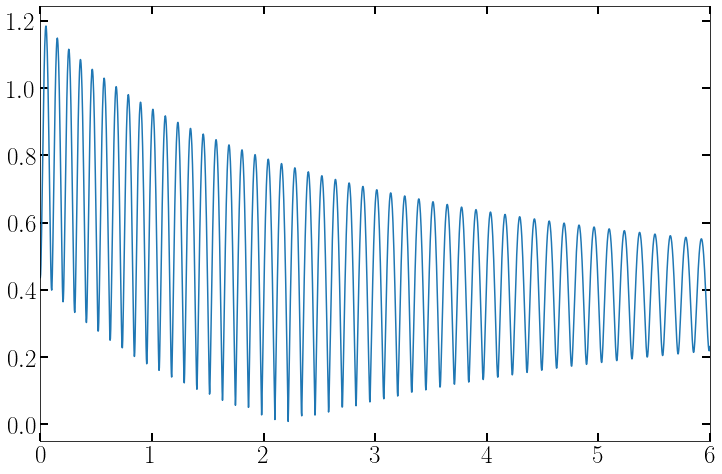

In [108]:
def Euler(t,y,epsilon,delta,P,Bp,k,chi,eta):
    
#     taup,taua,tauc=tau(P,epsilon,Bp,k)
    
    u1=y[0]; u2=y[1]; u3=y[2]
    
    du1=-1/(1+delta)/taup * u2*u3 + ((u3*cos(chi) + \
        u1*cos(eta)*sin(chi) + u2*sin(chi)*sin(eta))*(u2*cos(chi)\
        - u3*sin(chi)*sin(eta)))/taua + ((u1**2 + u2**2 + u3**2)*\
        (-u1 + cos(eta)*sin(chi)*(u3*cos(chi) \
        + u1*cos(eta)*sin(chi) + u2*sin(chi)*sin(eta))))/tauc
    
    du2=(1/taup * u1*u3 + ((-(u1*cos(chi)) + \
        u3*cos(eta)*sin(chi))*(u3*cos(chi) + u1*cos(eta)*sin(chi) \
        + u2*sin(chi)*sin(eta)))/taua + ((u1**2 + u2**2 + u3**2)*(-u2 \
        + sin(chi)*sin(eta)*(u3*cos(chi) + u1*cos(eta)*sin(chi) + \
        u2*sin(chi)*sin(eta))))/tauc)/(1+epsilon*delta/(1+delta))
    
    du3=(-u1*u2*delta/(1+delta)/taup+ sin(chi)*(((u1**2 + u2**2 + u3**2)*\
        (u1*cos(chi)*cos(eta) - u3*sin(chi) + \
        u2*cos(chi)*sin(eta)))/tauc + \
        ((-(u2*cos(eta)) + u1*sin(eta))*\
        (u3*cos(chi) + u1*cos(eta)*sin(chi) + \
        u2*sin(chi)*sin(eta)))/taua))/(1+epsilon)
    
    return [du1,du2,du3]


theta=radian(45)
epsilon=1e-7
delta=0
P=2
Bp=1e15
k=0.6
chi=radian(20)
eta=radian(0)
period=np.abs(P/epsilon/cos(theta))
print(period)
taup=P/epsilon; taua=10*taup;tauc=100*taup

x=np.linspace(0,1000*period,5000)
xspan=[x[0],x[-1]]
y0=[sin(theta),0,cos(theta)]
sol2=solve_ivp(Euler,xspan,y0,t_eval=x,args=(epsilon,delta,P,Bp,k,chi,eta),method='DOP853',rtol=1e-8)
# fig, (ax1, ax2) = plt.subplots(2,sharex=True,figsize=(8,6))
# ax1.plot(sol.t,sol.y[0,:])
# ax1.plot(sol.t,sol.y[1,:])
# ax2.plot(sol.t,sol.y[2,:])
# ax2.minorticks_on()
# ax1.minorticks_on()

u1=sol3.y[0,:]
u2=sol3.y[1,:]
u3=sol3.y[2,:]
L=(u1**2 + u2**2 + (1+epsilon)**2 * u3**2)**(0.5)
L3=(1+epsilon)*u3
Theta=np.arccos(L3/L)/pi*180
alpha=np.arccos((u1*sin(chi)+u3*cos(chi))/(u1**2 + u2**2 + u3**2)**(0.5))

plt.figure(figsize=(12,8))
plt.plot(x/tauc,alpha)
plt.xlim(0,6)

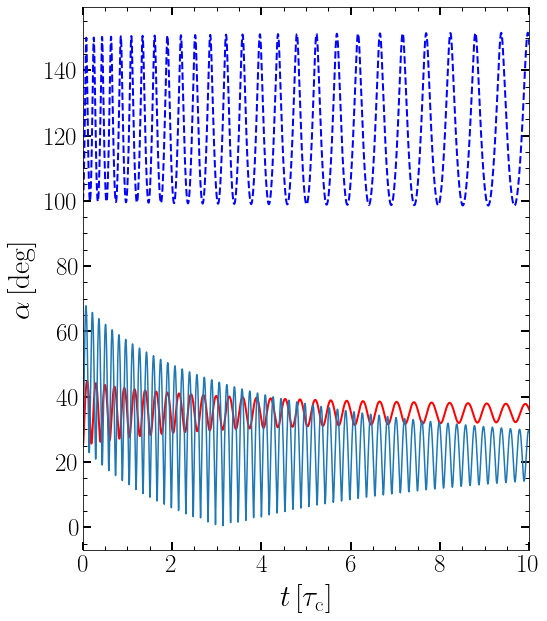

In [113]:
plt.figure(figsize=(8,10))
u1=sol1.y[0,:]
u2=sol1.y[1,:]
u3=sol1.y[2,:]
L=(u1**2 + u2**2 + (1+epsilon)**2 * u3**2)**(0.5)
L3=(1+epsilon)*u3
Theta=np.arccos(L3/L)/pi*180
alpha=np.arccos((u1*sin(chi)+u3*cos(chi))/(u1**2 + u2**2 + u3**2)**(0.5))/pi*180
plt.plot(x/tauc,alpha,color='r',linewidth=2)


u1=sol2.y[0,:]
u2=sol2.y[1,:]
u3=sol2.y[2,:]
L=(u1**2 + u2**2 + (1+epsilon)**2 * u3**2)**(0.5)
L3=(1+epsilon)*u3
Theta=np.arccos(L3/L)/pi*180
alpha=np.arccos((u1*sin(chi)+u3*cos(chi))/(u1**2 + u2**2 + u3**2)**(0.5))/pi*180
plt.plot(x/tauc,alpha,color='b',linewidth=2,linestyle='dashed')


u1=sol3.y[0,:]
u2=sol3.y[1,:]
u3=sol3.y[2,:]
L=(u1**2 + u2**2 + (1+epsilon)**2 * u3**2)**(0.5)
L3=(1+epsilon)*u3
Theta=np.arccos(L3/L)/pi*180
alpha=np.arccos((u1*sin(chi)+u3*cos(chi))/(u1**2 + u2**2 + u3**2)**(0.5))/pi*180
plt.plot(x/tauc,alpha)

plt.xlim(0,10)
plt.minorticks_on()
plt.xlabel(r'$t\, [\tau_{\rm c}]$',fontsize=30)
plt.ylabel(r'$\alpha\, [\rm deg]$',fontsize=30)
plt.savefig("/Users/yonggao/desktop/theta.pdf", format='pdf', bbox_inches="tight")